In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
data = pd.read_csv('housing.csv')

In [2]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [4]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [5]:
data.shape

(20640, 10)

In [6]:
train_set,test_set = train_test_split(data,test_size=0.2,random_state=42)

In [7]:
train_set.shape

(16512, 10)

In [8]:
test_set.shape

(4128, 10)

In [9]:
house = data.copy()

In [10]:
house['median_income']

0        8.3252
1        8.3014
2        7.2574
3        5.6431
4        3.8462
          ...  
20635    1.5603
20636    2.5568
20637    1.7000
20638    1.8672
20639    2.3886
Name: median_income, Length: 20640, dtype: float64

In [11]:
#to round up the income

In [12]:
house['income_cat'] = np.ceil(house['median_income']/1.5)

In [13]:
house['income_cat'].head()

0    6.0
1    6.0
2    5.0
3    4.0
4    3.0
Name: income_cat, dtype: float64

In [14]:
house['income_cat'].where (house['income_cat']<5,5.0,inplace=True)

In [15]:
house['income_cat'].value_counts()

3.0    7236
2.0    6581
4.0    3639
5.0    2362
1.0     822
Name: income_cat, dtype: int64

In [16]:
sns.set_style('darkgrid')

<AxesSubplot:>

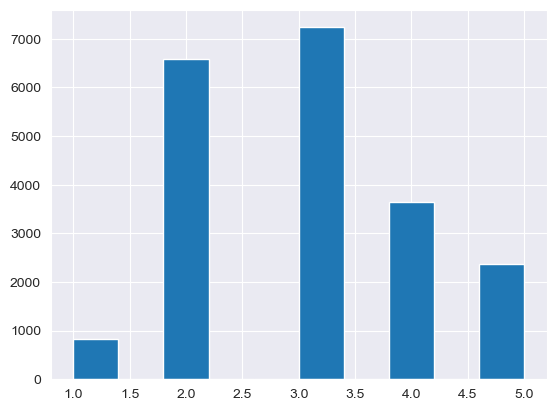

In [17]:
house.income_cat.hist()

In [18]:
from sklearn.model_selection import StratifiedShuffleSplit

In [19]:
# to split the training data and test data proportion

In [20]:
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(house,house['income_cat']):
    strat_train_set = house.loc[train_index]
    strat_test_set = house.loc[test_index]

In [21]:
strat_test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,500001.0,<1H OCEAN,5.0
17352,-120.42,34.89,24.0,2020.0,307.0,855.0,283.0,5.0099,162500.0,<1H OCEAN,4.0
3505,-118.45,34.25,36.0,1453.0,270.0,808.0,275.0,4.3839,204600.0,<1H OCEAN,3.0
7777,-118.10,33.91,35.0,1653.0,325.0,1072.0,301.0,3.2708,159700.0,<1H OCEAN,3.0
14155,-117.07,32.77,38.0,3779.0,614.0,1495.0,614.0,4.3529,184000.0,NEAR OCEAN,3.0


In [22]:
strat_train_set.shape

(16512, 11)

In [23]:
len(strat_test_set)

4128

In [24]:
strat_test_set['income_cat'].value_counts()

3.0    1447
2.0    1316
4.0     728
5.0     472
1.0     165
Name: income_cat, dtype: int64

In [25]:
strat_test_set['income_cat'].value_counts()/len(strat_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114341
1.0    0.039971
Name: income_cat, dtype: float64

In [26]:
1447/4128

0.3505329457364341

In [27]:
strat_test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,500001.0,<1H OCEAN,5.0
17352,-120.42,34.89,24.0,2020.0,307.0,855.0,283.0,5.0099,162500.0,<1H OCEAN,4.0
3505,-118.45,34.25,36.0,1453.0,270.0,808.0,275.0,4.3839,204600.0,<1H OCEAN,3.0
7777,-118.10,33.91,35.0,1653.0,325.0,1072.0,301.0,3.2708,159700.0,<1H OCEAN,3.0
14155,-117.07,32.77,38.0,3779.0,614.0,1495.0,614.0,4.3529,184000.0,NEAR OCEAN,3.0


In [28]:
for set in (strat_test_set,strat_train_set):
    set.drop('income_cat',axis=1,inplace=True)

In [29]:
strat_train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN


In [30]:
strat_test_set.shape

(4128, 10)

In [31]:
strat_train_set.shape

(16512, 10)

In [32]:
housing = strat_train_set.copy()

In [33]:
plt.rcParams['figure.figsize']=(10,10)

In [34]:
# dataset are same as the map of california

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

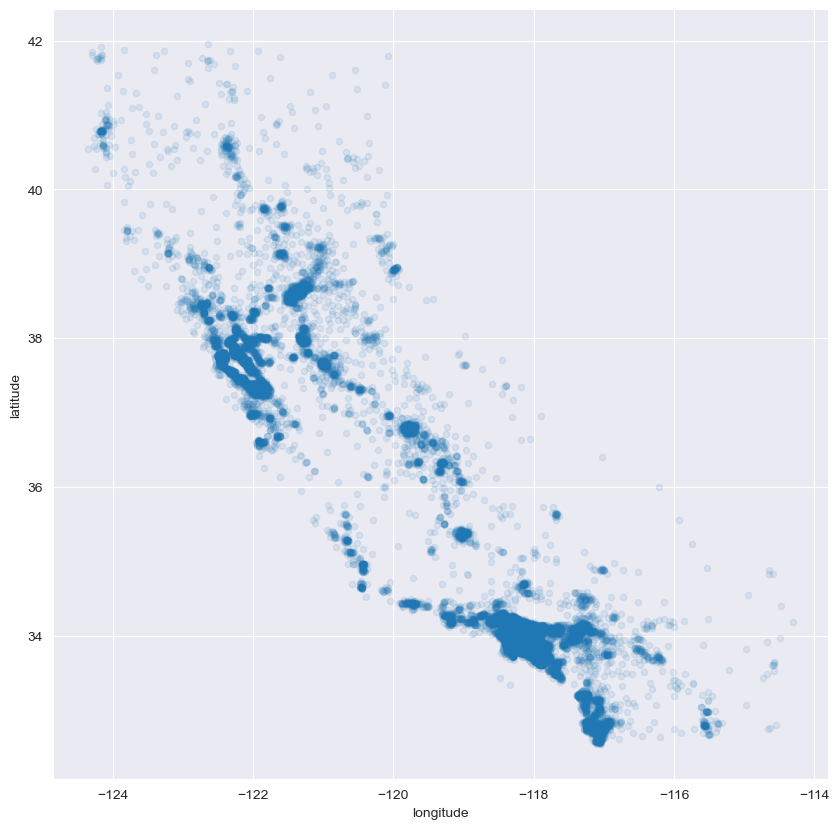

In [35]:
housing.plot(kind='scatter',x='longitude',y='latitude',alpha=0.1)

In [36]:
##checking correlations

In [37]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [38]:
housing.shape

(16512, 10)

In [39]:
corr_matrix = housing.corr()

In [40]:
corr_matrix['median_house_value'].sort_values(ascending=True)

latitude             -0.142673
longitude            -0.047466
population           -0.026882
total_bedrooms        0.047781
households            0.064590
housing_median_age    0.114146
total_rooms           0.135140
median_income         0.687151
median_house_value    1.000000
Name: median_house_value, dtype: float64

In [41]:
from pandas.plotting import scatter_matrix
attributes = [
    'median_house_value',
    'median_income',
    'total_rooms',
    'housing_median_age'
]

In [42]:
housing['rooms_per_hh'] = housing['total_rooms']/housing['households']

In [43]:
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']

In [44]:
housing['population_per_hh'] = housing['population']/housing['households']

In [45]:
corr_matrix = housing.corr()

In [46]:
corr_matrix.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_hh,bedrooms_per_room,population_per_hh
longitude,1.000000,-0.924478,-0.105823,0.048909,0.076686,0.108071,0.063146,-0.019615,-0.047466,-0.028374,0.095645,-0.000415
latitude,-0.924478,1.000000,0.005737,-0.039245,-0.072550,-0.115290,-0.077765,-0.075146,-0.142673,0.107665,-0.116955,0.005426
housing_median_age,-0.105823,0.005737,1.000000,-0.364535,-0.325101,-0.298737,-0.306473,-0.111315,0.114146,-0.147184,0.136768,0.015031
total_rooms,0.048909,-0.039245,-0.364535,1.000000,0.929391,0.855103,0.918396,0.200133,0.135140,0.127549,-0.192655,-0.024806
total_bedrooms,0.076686,-0.072550,-0.325101,0.929391,1.000000,0.876324,0.980167,-0.009643,0.047781,0.000426,0.086883,-0.028364


In [47]:
strat_train_set.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [48]:
housing = strat_train_set.drop('median_house_value',axis=1)
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN


In [49]:
housing_labels = strat_train_set['median_house_value'].copy()

In [50]:
housing.shape

(16512, 9)

In [51]:
housing_labels.head(6)

12655     72100.0
15502    279600.0
2908      82700.0
14053    112500.0
20496    238300.0
1481     165700.0
Name: median_house_value, dtype: float64

In [52]:
# data cleaning
# ged rid of the corresponding districts
# get rid of the whole attribute
# set the values to some values by(mean,median,mode)

In [53]:
housing['total_bedrooms'].isnull().sum()

158

In [54]:
from sklearn.impute import SimpleImputer

In [55]:
imputer = SimpleImputer(strategy='median')

In [56]:
imputer

SimpleImputer(strategy='median')

In [57]:
housing_num = housing.drop(['ocean_proximity'],axis=1)

In [58]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [59]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [60]:
X = imputer.transform(housing_num)

In [61]:
housing_tr = pd.DataFrame(X,columns=housing_num.columns)

In [62]:
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
1,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
3,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
4,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964


In [63]:
from sklearn.preprocessing import LabelEncoder

In [64]:
encoder = LabelEncoder()

In [65]:
housing.ocean_proximity.unique()

array(['INLAND', 'NEAR OCEAN', '<1H OCEAN', 'NEAR BAY', 'ISLAND'],
      dtype=object)

In [66]:
housing_cat = housing['ocean_proximity']
housing_cat_encoded = encoder.fit_transform(housing_cat)

In [67]:
housing_cat_encoded

array([1, 4, 1, ..., 0, 0, 1])

In [68]:
(housing_cat_encoded ==1)

array([ True, False,  True, ..., False, False,  True])

In [69]:
encoder.classes_

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)

In [70]:
# one hot encoding

In [71]:
from sklearn.preprocessing import OneHotEncoder

In [72]:
encoder = OneHotEncoder()

In [73]:
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))

In [74]:
housing_cat_1hot.ndim

2

In [75]:
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [76]:
strat_housing = strat_train_set.copy()

In [77]:
rooms_ix,bedrooms_ix,population_ix,households_ix = [(list(strat_housing.columns).index(col))
for col in ['total_rooms','total_bedrooms','population','households']]

In [78]:
from sklearn.preprocessing import FunctionTransformer

In [79]:
from sklearn.compose import ColumnTransformer

def add_extra_features (X,add_bedrooms_per_room=True):
    rooms_per_households = X[:,rooms_ix]/X[:,households_ix]
    population_per_households = X[:,population_ix]/X[:,households_ix]
    
    if add_bedrooms_per_room:
        bedrooms_per_room = X[:,bedrooms_ix]/X[:,rooms_ix]
        return np.c_[X,rooms_per_households,population_per_households,bedrooms_per_room]
    else:
        return np.c_[X,rooms_per_households,population_per_households] 

In [80]:
attribute_adder = FunctionTransformer(add_extra_features,validate=False,kw_args={'add_bedrooms_per_room':False})

In [81]:
housing_extra_attribs = attribute_adder.fit_transform(strat_housing.values)

In [82]:
housing_extra_attribs = pd.DataFrame(housing_extra_attribs,columns=list(strat_housing.columns)+['rooms_per_households','population_per_households'],index=strat_housing.index)

In [83]:
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_households,population_per_households
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND,5.485836,3.168555
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN,6.927083,2.623698
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.875,82700.0,INLAND,5.393333,2.223333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN,3.886128,1.859213
20496,-118.7,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN,6.096552,3.167241


In [84]:
# pipeline creation

In [85]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [86]:
num_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy='median')),
    ('attriribute_adder',FunctionTransformer(add_extra_features,validate=False)),
    ('std_scaler',StandardScaler()),
])

In [87]:
housing_num.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964


In [88]:
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [89]:
from sklearn.compose import ColumnTransformer

In [90]:
num_attribs = list(housing_num)

In [91]:
cat_attribs = ['ocean_proximity']


In [92]:
full_pipeline = ColumnTransformer([
    ('num',num_pipeline,num_attribs),
    ('cat',OneHotEncoder(),cat_attribs)
])

In [93]:
housing_prepared = full_pipeline.fit_transform(strat_housing)

In [94]:
housing_prepared

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

In [95]:
#select and train a model

In [96]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
lin_model = LinearRegression()
lin_model.fit(housing_prepared,housing_labels)

LinearRegression()

In [97]:
some_data = strat_housing.iloc[:5]
some_labels = housing_labels.iloc[:5]

In [98]:
some_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN


In [99]:
some_labels.head()

12655     72100.0
15502    279600.0
2908      82700.0
14053    112500.0
20496    238300.0
Name: median_house_value, dtype: float64

In [100]:
some_data_prepared =full_pipeline.transform(some_data)

In [101]:
('predictions',lin_model.predict(some_data_prepared))

('predictions',
 array([ 85657.90192014, 305492.60737488, 152056.46122456, 186095.70946094,
        244550.67966089]))

In [102]:
('labels',list[some_labels])

('labels',
 list[12655     72100.0
 15502    279600.0
 2908      82700.0
 14053    112500.0
 20496    238300.0
 Name: median_house_value, dtype: float64])

In [103]:
housing_predictions = lin_model.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels,housing_predictions)
lin_rmse = np.sqrt(lin_mse)

In [104]:
lin_mse

4709785076.060029

In [105]:
lin_rmse

68627.87390018745

In [106]:
# mean absolute error

In [107]:
from sklearn.metrics import mean_absolute_error

In [108]:
lin_mae = mean_absolute_error(housing_labels,housing_predictions)
lin_mae

49438.66860915802

In [109]:
# trying various models 

In [110]:
# 1.DECISION TREE ANALYSIS

In [111]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(random_state=42)

In [112]:
tree_reg.fit(housing_prepared,housing_labels)

DecisionTreeRegressor(random_state=42)

In [113]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels,housing_predictions)

In [114]:
tree_rmse = np.sqrt(tree_mse) 

In [115]:
tree_mse

0.0

In [116]:
tree_rmse

0.0

In [117]:
# the data is over fitted

In [118]:
# CROSS VALIDATION for better evaluation

In [119]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg,housing_prepared,housing_labels,scoring='neg_mean_squared_error',cv=10)

In [120]:
tree_rmse_scores = np.sqrt(scores)

C:\Users\manoj\AppData\Local\Temp\ipykernel_8224\3023855858.py:1: RuntimeWarning: invalid value encountered in sqrt
  tree_rmse_scores = np.sqrt(scores)


In [121]:
tree_rmse_scores

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

In [122]:
def display_scores (scores):
    print('scores',scores)
    print('scores_mean',scores.mean())
    print('scores_std_div',scores.std())
    
display_scores(tree_rmse_scores)

scores [nan nan nan nan nan nan nan nan nan nan]
scores_mean nan
scores_std_div nan


In [123]:
lin_scores = cross_val_score(lin_model,housing_prepared,housing_labels,scoring='neg_mean_squared_error',cv=10)

In [124]:
display_scores(lin_scores)

scores [-5.14989425e+09 -4.11073216e+09 -4.59293165e+09 -4.71078941e+09
 -4.46840655e+09 -5.26031619e+09 -5.47556792e+09 -4.73376148e+09
 -4.41471057e+09 -4.91959144e+09]
scores_mean -4783670160.819972
scores_std_div 398880955.0693706


In [125]:
# RANDOM FOREST REGRESSOR

In [126]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(n_estimators=10,random_state=42)
forest_reg.fit(housing_prepared,housing_labels)
housing_predictions = forest_reg.predict(housing_prepared)

In [127]:
forest_mse = mean_squared_error(housing_labels,housing_predictions)

In [128]:
forest_mse

502362949.7326593

In [129]:
forest_rmse = np.sqrt(forest_mse)
forest_rmse

22413.454658589766

In [130]:
forest_scores = cross_val_score(forest_reg,housing_prepared,housing_labels,scoring='neg_mean_squared_error',cv=10)
forest_scores

array([-2.86428927e+09, -2.54695222e+09, -2.39357393e+09, -2.89139793e+09,
       -2.58174857e+09, -3.01138600e+09, -3.13743375e+09, -2.73078248e+09,
       -2.65510715e+09, -3.10946311e+09])

In [131]:
forest_rmse_scores = np.sqrt(forest_scores)

C:\Users\manoj\AppData\Local\Temp\ipykernel_8224\3848978258.py:1: RuntimeWarning: invalid value encountered in sqrt
  forest_rmse_scores = np.sqrt(forest_scores)


In [132]:
forest_rmse_scores

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

In [133]:
display_scores=(forest_rmse_scores)

In [134]:
scores=cross_val_score(lin_model,housing_prepared,housing_labels,scoring='neg_mean_squared_error',cv=10)

In [135]:
pd.Series(np.sqrt(scores)).describe()

C:\Users\manoj\AppData\Local\Temp\ipykernel_8224\1831880849.py:1: RuntimeWarning: invalid value encountered in sqrt
  pd.Series(np.sqrt(scores)).describe()


count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
dtype: float64

In [136]:
# Fine tune models

In [137]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [138]:
# choosing the best model
# in here it is randomforestregressor

In [139]:
param_grid=[{'n_estimators':[3,10,30],'max_features':[2,4,6,8]},
            {'bootstrap':[False],'n_estimators':[3,10],'max_features':[2,3,4]}]

In [140]:
forest_reg = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(forest_reg,param_grid,cv=5,scoring='neg_mean_squared_error',return_train_score=True)
grid_search.fit(housing_prepared,housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [141]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [142]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)

In [143]:
CVres = grid_search.cv_results_
for mean_scores,params in zip(CVres['mean_test_score'],CVres['params']):
    print (np.sqrt(-mean_scores),params)

63895.161577951665 {'max_features': 2, 'n_estimators': 3}
54916.32386349543 {'max_features': 2, 'n_estimators': 10}
52885.86715332332 {'max_features': 2, 'n_estimators': 30}
60075.3680329983 {'max_features': 4, 'n_estimators': 3}
52495.01284985185 {'max_features': 4, 'n_estimators': 10}
50187.24324926565 {'max_features': 4, 'n_estimators': 30}
58064.73529982314 {'max_features': 6, 'n_estimators': 3}
51519.32062366315 {'max_features': 6, 'n_estimators': 10}
49969.80441627874 {'max_features': 6, 'n_estimators': 30}
58895.824998155826 {'max_features': 8, 'n_estimators': 3}
52459.79624724529 {'max_features': 8, 'n_estimators': 10}
49898.98913455217 {'max_features': 8, 'n_estimators': 30}
62381.765106921855 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54476.57050944266 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59974.60028085155 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52754.5632813202 {'bootstrap': False, 'max_features': 3, 'n_estimators': 1

In [144]:
feature_importance = grid_search.best_estimator_.feature_importances_

In [145]:
feature_importance

array([6.96542523e-02, 6.04213840e-02, 4.21882202e-02, 1.52450557e-02,
       1.55545295e-02, 1.58491147e-02, 1.49346552e-02, 3.79009225e-01,
       5.47789150e-02, 1.07031322e-01, 4.82031213e-02, 6.79266007e-03,
       1.65706303e-01, 7.83480660e-05, 1.52473276e-03, 3.02816106e-03])

In [146]:
extra_attribs = ['rooms_per_hhold','population_per_hhold','bedrooms_per_room']
cat_encoder = full_pipeline.named_transformers_['cat']
cat_onehot_attribs = list(cat_encoder.categories_[0])
attributes= num_attribs+extra_attribs+cat_attribs+cat_onehot_attribs
sorted(zip(feature_importance,attributes),reverse=True)

[(0.3790092248170967, 'median_income'),
 (0.16570630316895876, '<1H OCEAN'),
 (0.10703132208204355, 'population_per_hhold'),
 (0.06965425227942929, 'longitude'),
 (0.0604213840080722, 'latitude'),
 (0.054778915018283726, 'rooms_per_hhold'),
 (0.048203121338269206, 'bedrooms_per_room'),
 (0.04218822024391753, 'housing_median_age'),
 (0.015849114744428634, 'population'),
 (0.015554529490469328, 'total_bedrooms'),
 (0.01524505568840977, 'total_rooms'),
 (0.014934655161887772, 'households'),
 (0.006792660074259966, 'ocean_proximity'),
 (0.0030281610628962747, 'NEAR BAY'),
 (0.0015247327555504937, 'ISLAND'),
 (7.834806602687504e-05, 'INLAND')]

In [147]:
final_mod = grid_search.best_estimator_
final_mod

RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)

In [148]:
test_label = strat_test_set['median_house_value'].copy()

In [149]:
test_prepared = full_pipeline.transform(strat_test_set)
final_predictions = final_mod.predict(test_prepared)
final_mse = mean_squared_error(test_label,final_predictions)

In [150]:
final_mse

2291849114.7652025

In [151]:
final_predictions

array([488167.46666667, 229946.66666667, 209950.        , ...,
       390406.86666667, 246210.03333333, 223533.33333333])

In [152]:
from scipy import stats

In [153]:
confidence = 0.95
squared_errors = (final_predictions-test_label)**2
mean=squared_errors.mean()

In [154]:
mean

2291849114.765181

In [155]:
m = len(squared_errors)

In [156]:
zscore =stats.norm.ppf((1+confidence)/2)
zmargin = zscore+squared_errors.std(ddof=1)/np.sqrt(m)

In [157]:
zmargin

94692609.30589478

In [158]:
zscore

1.959963984540054

In [159]:
np.sqrt(mean-zmargin),np.sqrt(mean+zmargin)

(46873.83604378125, 48852.24379771185)